In [2]:
!pip install quandl

    100% |████████████████████████████████| 51kB 3.6MB/s 
    100% |████████████████████████████████| 71kB 3.6MB/s 
  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/41/fa/e9/2995f4ab121e9f30f342fa2d43f0b27f851a0cb9f0d98d3b45
Successfully built inflection


0.983613686849 0.978306039473


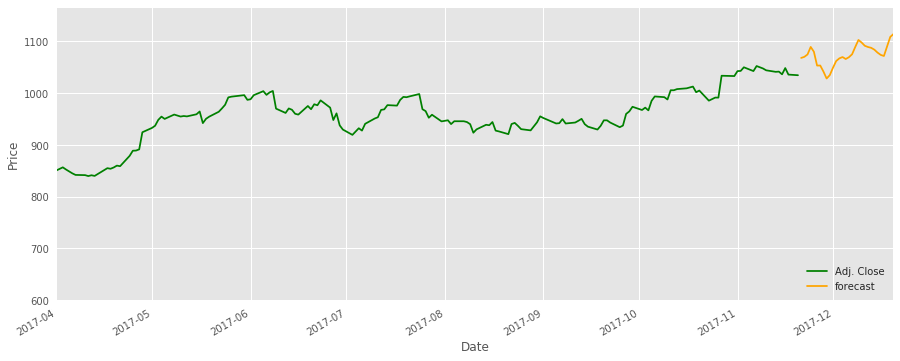

            Adj. Close  HL_PCT  PCT_CHNG  Adj. Volume  label     forecast
Date                                                                     
2017-12-06         NaN     NaN       NaN          NaN    NaN  1069.398082
2017-12-07         NaN     NaN       NaN          NaN    NaN  1075.112980
2017-12-08         NaN     NaN       NaN          NaN    NaN  1089.249526
2017-12-09         NaN     NaN       NaN          NaN    NaN  1102.783870
2017-12-10         NaN     NaN       NaN          NaN    NaN  1097.810090
2017-12-11         NaN     NaN       NaN          NaN    NaN  1091.519320
2017-12-12         NaN     NaN       NaN          NaN    NaN  1089.153380
2017-12-13         NaN     NaN       NaN          NaN    NaN  1087.568873
2017-12-14         NaN     NaN       NaN          NaN    NaN  1084.020617
2017-12-15         NaN     NaN       NaN          NaN    NaN  1078.334339
2017-12-16         NaN     NaN       NaN          NaN    NaN  1073.920380
2017-12-17         NaN     NaN       N

In [12]:
import pandas as pd
import numpy as np
import quandl, math
import datetime
# Machine Learning
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Visualization
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

quandl.ApiConfig.api_key = 'q-UWpMLYsWKFejy5y-4a'# mã đăng kí khi bạn xuất ra kết quả nhiều lần 
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']] #tạo khung cho 5 cột
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/(df['Adj. Low']*100) # % thay đổi cao thấp
df['PCT_CHNG'] = (df['Adj. Close'] - df['Adj. Open'])/(df['Adj. Open']*100)
df = df[['Adj. Close', 'HL_PCT', 'PCT_CHNG', 'Adj. Volume']]

forecast_col = 'Adj. Close' 
forecast_out = int(30)
df['label'] = df[forecast_col].shift(-forecast_out)# đẩy 5 giá trị từ dưới lên, you can print it 
X = np.array(df.drop(['label'], 1))# tạo mảng X và bỏ qua cột 'label'
X = preprocessing.scale(X)# xử lý dữ liệu trung bình or có thể dùng Standardization
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]# lấy từ trên cho đến đầu 30 hàng cuối 

y = np.array(df['label'])# tạm gọi là y gốc
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.2)# chia tách dữ liệu, kích thước 20%
lm = LinearRegression()# áp dụng hồi quy vào
lm.fit(X_train, y_train)# phù hợp đường tuyến tính giữa X_train, y_train

accuracy1= lm.score(X_train, y_train)
accuracy = lm.score(X_test, y_test)
print(accuracy,accuracy1)

y_train_predict=lm.predict(X_train)
y_test_predict=lm.predict(X_test)
# bat dau du doan
forecast_prediction = lm.predict(X_forecast_out)# bước tiến sơ cấp ví như các giọt axit-amin, mầm móng sự sóng
#nó học từ mô hình phía trên bằng cách tính đường phù hợp giữa 2 biến X và y, sau đó tự dự đoán 

df.dropna(inplace=True) 
# sau khi dropna(inplace=True)
# chức năng: bỏ qua tại vị trí từ 2017-12-26 đến 2018-01-03 vì NaN
# số liệu bên 'label' không giống với 'Adj.close',dẫn đến ghép nối ko liên quan
# mục đích:cắt ngay tại vị trí 2017-12-26 , bắt cầu cho df['forecast'] dẫn đường cho df.loc[next_date] để dự đoán.

df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(5)]+[i] # i lấy từng cái 1 của forecast_prediction cho vào cột forecast
                                                       #bắt đầu từ đoạn 2017-12-27 thả vào NaN 5 hàng chạy theo i là 30 cho hết vòng lặp
df['Adj. Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2017, 4, 1))
plt.ylim(ymin=600)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
print( df.tail(15))
print( forecast_prediction)
print( df.head(2))


In [49]:
X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
# xem bình phương lỗi trung binh
print('MSE train: %.2f, test: %.2f' % (
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
# xem bình phương r, nằm giữa 0 và 1,R^2 >0.8 là tốt, gần với 1   
print('R^2 train: %.2f, test: %.2f' % (
                r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))


MSE train: 1215.83, test: 1166.24
R^2 train: 0.98, test: 0.98


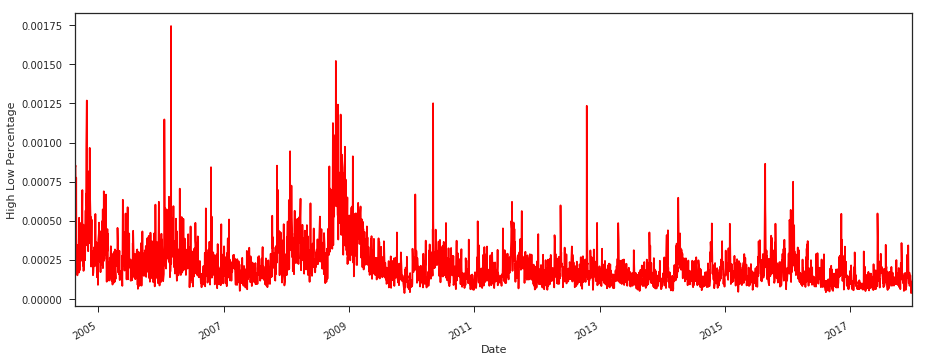

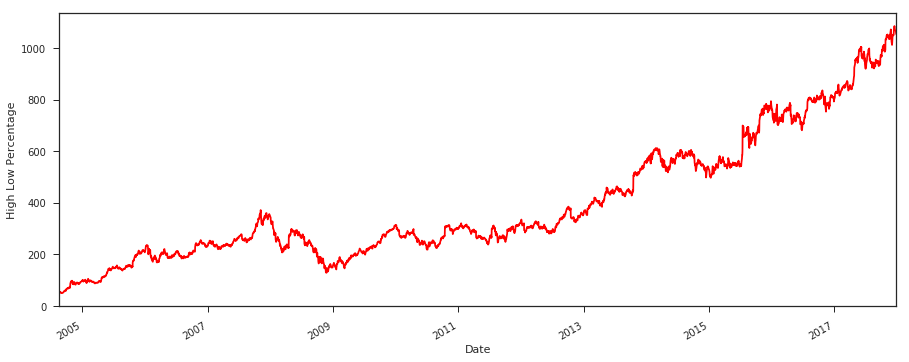

In [98]:
# biểu đồ
df['HL_PCT'].plot(figsize=(15,6), color="red")
plt.xlabel('Date')
plt.ylabel('High Low Percentage')
plt.show()

df['Adj. Close'].plot(figsize=(15,6), color="red")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

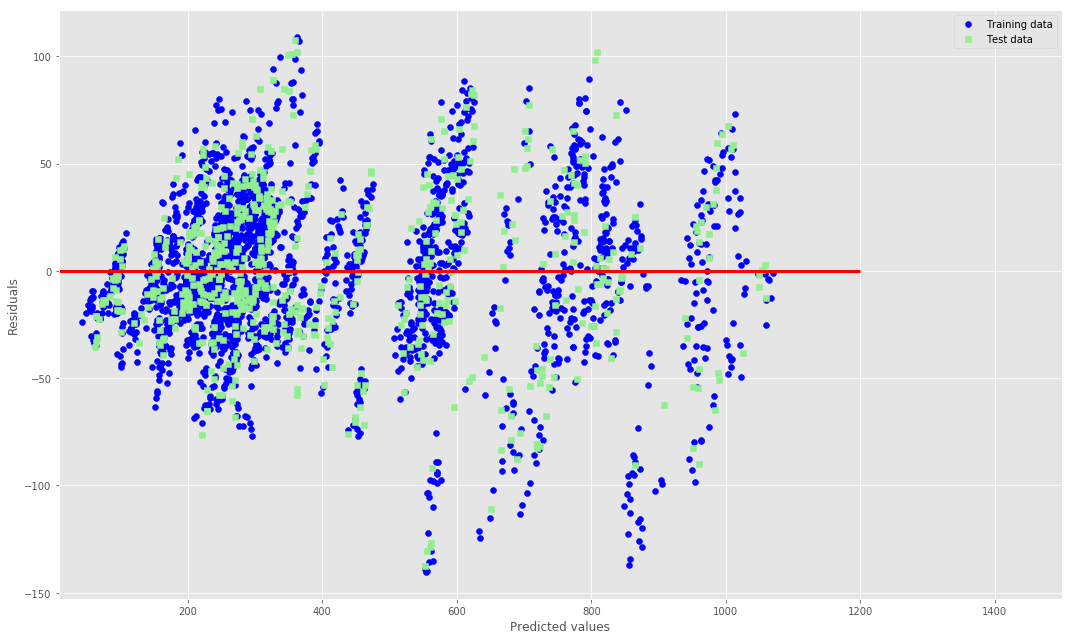

In [18]:
#residual cũng nhìn tương quan như hồi quy, vì trường hợp này có nhiều biến X và 1 biến y nên tôi chưa tìm ra cách biểu diễn tuyến tính
# thường dữ liệu càng gần đường đỏ thì càng đúng, bạn có thể xem thêm:https://www.khanacademy.org/math/statistics-probability
width = 15
height = 9
plt.figure(figsize=(width, height))

plt.scatter(y_train_pred,  y_train_pred - y_train,   c='blue', marker='o', label='Training data') 
      
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')


plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=1200.000, lw=3, color='red')
plt.xlim([8, 1500])
plt.tight_layout()
plt.savefig('fig-housing-pairwise-dist.png', dpi=300)
plt.show()

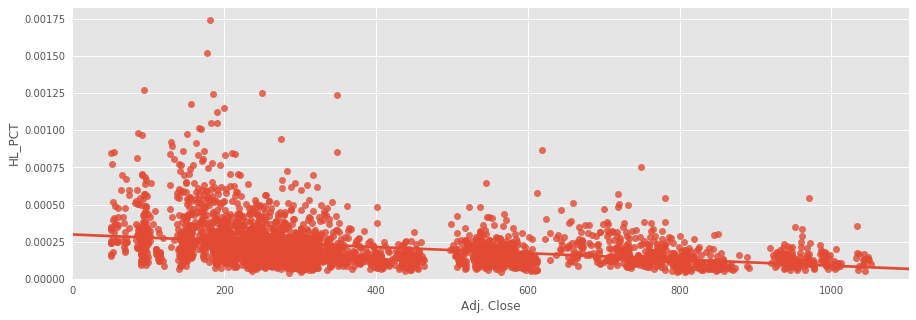

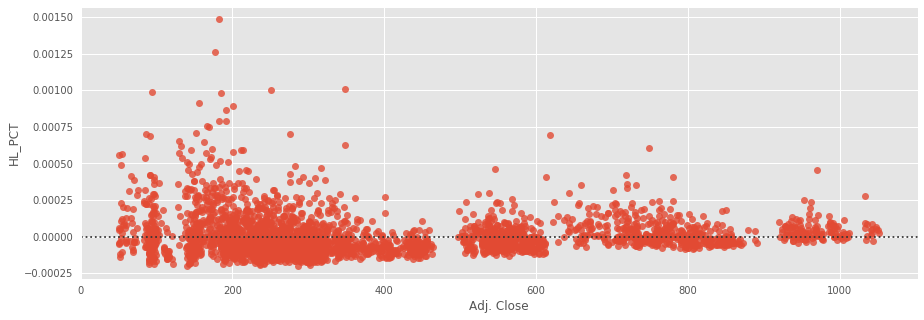

In [14]:
# biểu diễn linear regression cho đơn biến
width = 15
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='Adj. Close', y='HL_PCT', data=df)
plt.ylim(0,)
plt.show()

plt.figure(figsize=(width, height))
sns.residplot( df['Adj. Close'],df['HL_PCT'])
plt.show()





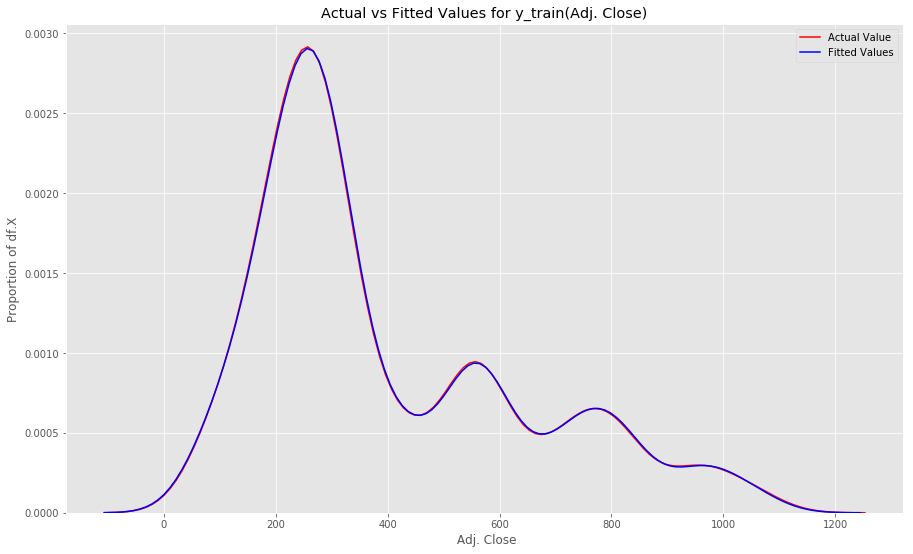

In [13]:
# điểm phù hợp giữa y gốc và y dự đoán...hình cả hai ăn khớp luôn:)
width = 15
height = 9
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot( y_train_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for y_train(Adj. Close)')
plt.xlabel(' Adj. Close')
plt.ylabel('Proportion of df.X')
plt.show()

